DEEP LEARNING

LAB-6

PRANSHU PARATE

202211063

Linneaus5 dataset

**Build CNN model for Linneaus5 dataset (you can download 32*32 size images)** 

In [ ]:
#import the packages
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math  
import datetime
import time

In [ ]:
#Default dimensions we found online
img_width, img_height = 224, 224  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = "C:/Users/Dell/Downloads/Linnaeus 5 32X32/train"  

test_data_dir = "C:/Users/Dell/Downloads/Linnaeus 5 32X32/test" 
   
# number of epochs to train the model  
epochs = 7 #this has been changed after multiple model run 

# batch size  
batch_size = 50 

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255,validation_split = 0.2)

In [ ]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet') 

In [ ]:
generator_train = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',
         subset = 'training',
         shuffle=False)  
   
nb_train_samples = len(generator_train.filenames)  
num_classes = len(generator_train.class_indices) 
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
bottleneck_features_train = vgg16.predict(generator_train, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)

Found 4800 images belonging to 5 classes.
96/96 [==============================] - 1689s 18s/step


In [ ]:
generator_val = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None, 
     subset = 'validation',
     shuffle=False) 

nb_validation_samples = len(generator_val.filenames)  
   
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))  
   
bottleneck_features_validation = vgg16.predict(  
     generator_val, predict_size_validation)  
   
np.save('bottleneck_features_validation.npy', bottleneck_features_validation) 

Found 1200 images belonging to 5 classes.
24/24 [==============================] - 299s 13s/step


In [ ]:
generator_test = datagen.flow_from_directory(  
     test_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_test_samples = len(generator_test.filenames)  
   
predict_size_test = int(math.ceil(nb_test_samples / batch_size))  
   
bottleneck_features_test = vgg16.predict(  
     generator_test, predict_size_test)  
   
np.save('bottleneck_features_test.npy', bottleneck_features_test) 

Found 2000 images belonging to 5 classes.
40/40 [==============================] - 788s 20s/step


In [ ]:
train_data = np.load('bottleneck_features_train.npy')  
train_labels = generator_train.classes  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

validation_data = np.load('bottleneck_features_validation.npy') 
validation_labels = generator_val.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 

test_data = np.load('bottleneck_features_test.npy')  
test_labels = generator_test.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes)

In [ ]:
#Building the model
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

In [ ]:
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

C:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#fitting the model
history = model.fit(train_data, train_labels,  
      epochs=25,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

Epoch 1/25
96/96 [==============================] - 5s 40ms/step - loss: 1.5757 - acc: 0.2640 - val_loss: 1.4620 - val_acc: 0.4100
Epoch 2/25
96/96 [==============================] - 3s 35ms/step - loss: 1.4505 - acc: 0.3419 - val_loss: 1.3192 - val_acc: 0.4917
Epoch 3/25
96/96 [==============================] - 3s 35ms/step - loss: 1.3961 - acc: 0.3846 - val_loss: 1.2654 - val_acc: 0.5183
Epoch 4/25
96/96 [==============================] - 3s 34ms/step - loss: 1.3523 - acc: 0.4144 - val_loss: 1.2167 - val_acc: 0.5492
Epoch 5/25
96/96 [==============================] - 3s 34ms/step - loss: 1.2948 - acc: 0.4344 - val_loss: 1.1966 - val_acc: 0.5333
Epoch 6/25
96/96 [==============================] - 4s 37ms/step - loss: 1.2548 - acc: 0.4652 - val_loss: 1.1686 - val_acc: 0.5758
Epoch 7/25
96/96 [==============================] - 3s 36ms/step - loss: 1.2299 - acc: 0.4875 - val_loss: 1.1300 - val_acc: 0.5817
Epoch 8/25
96/96 [==============================] - 3s 35ms/step - loss: 1.1889 - a

In [ ]:
#evaluating the model
(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)


24/24 [==============================] - 0s 10ms/step - loss: 0.9346 - acc: 0.6383


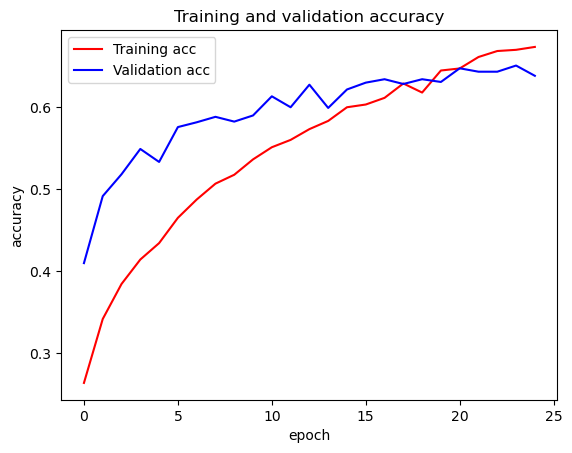

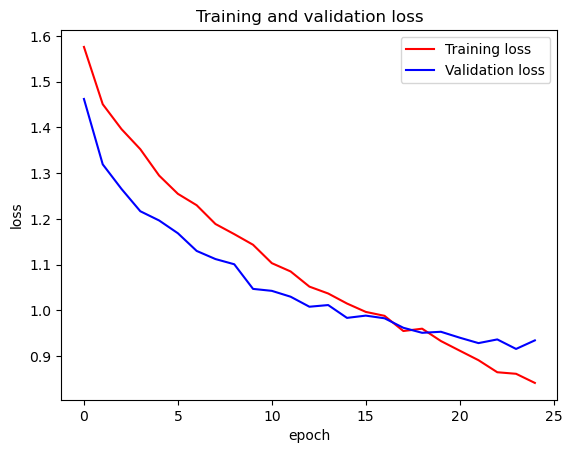

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
#evaluating the model
model.evaluate(test_data, test_labels)

63/63 [==============================] - 1s 7ms/step - loss: 0.9576 - acc: 0.6185


[0.9576342105865479, 0.6184999942779541]

In [ ]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0) 
labels = ['flower','dog','bird','berry','other']

test data [[[[5.94689608e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    3.34150195e-02 0.00000000e+00]
   [3.52880836e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    2.70822406e-01 0.00000000e+00]
   [2.81049311e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    2.72954315e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    2.09389716e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    2.06079841e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    4.19918478e-01 0.00000000e+00]]

  [[4.92194027e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    2.53683925e-02 0.00000000e+00]
   [5.48488021e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [4.04510677e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+0

In [ ]:
classification_metrics = metrics.classification_report(test_labels, preds, target_names=labels )
print(classification_metrics)

              precision    recall  f1-score   support

      flower       0.67      0.61      0.64       400
         dog       0.69      0.18      0.29       400
        bird       0.66      0.77      0.71       400
       berry       0.73      0.56      0.63       400
       other       0.79      0.39      0.53       400

   micro avg       0.70      0.50      0.58      2000
   macro avg       0.71      0.50      0.56      2000
weighted avg       0.71      0.50      0.56      2000
 samples avg       0.50      0.50      0.50      2000



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
